# Data Preparation

In [12]:
import zipfile
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# function to read csv from zip file
def read_csv_from_zip(zip_file, csv_file, chunk_size):
    """
    Reads a CSV file from a ZIP archive in chunks and returns a concatenated pandas DataFrame.

    Parameters:
    zip_file (str): Path to the ZIP file.
    csv_file (str): Name of the CSV file inside the ZIP archive.
    chunk_size (int): The number of rows per chunk. Default is 10,000.

    Returns:
    pd.DataFrame: A DataFrame containing the entire CSV file content.
    """
    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # Open the ZIP file
    with zipfile.ZipFile(zip_file) as z:
        # Open the CSV file inside the ZIP
        with z.open(csv_file) as f:
            # Read the CSV file in chunks and concatenate them
            for chunk in pd.read_csv(f, chunksize=chunk_size):
                df = pd.concat([df, chunk], ignore_index=True)
    
    return df

In [ ]:
# zip and csv file names
zip2022 = 'MH-CLD-2022-DS0001-bndl-data-csv_v1.zip'
csv2022 = 'mhcld_puf_2022.csv'

# define chunk size
chunk_size = 10000
mhc_2022 = read_csv_from_zip(zip2022, csv2022, chunk_size)

In [ ]:
# columns to keep 
columns_to_keep = ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SUB', 'DEPRESSFLG', 'EMPLOY', 'VETERAN', 'LIVARAG']

# Remove the columns from the original dataset
mhc_2022_cleaned = mhc_2022[columns_to_keep]

## Missing Data

In [ ]:
# drop rows with missing (-9) values
mhc_2022_cleaned = mhc_2022_cleaned[~mhc_2022_cleaned.isin([-9]).any(axis=1)]

In [ ]:
# combine the datasets
mhc_combined = mhc_2022_cleaned

# print shape
print(mhc_combined.shape)

(228891, 10)


In [ ]:
# send to csv
mhc_combined.to_csv('mhc_combined.csv', index=False)

## Class Imbalance

In [8]:
mhc_combined = pd.read_csv('mhc_combined.csv')

# Identify class imbalances
depressflg_dist = Counter(mhc_combined['DEPRESSFLG'])

# Display counts
print("Depression Flag counts:", depressflg_dist)

# Calculate and round proportions to two decimals
depressflg_prop = {k: round(v / sum(depressflg_dist.values()), 2) for k, v in depressflg_dist.items()}

print("\nDepression Flag proportions:", depressflg_prop)

Depression Flag counts: Counter({0: 140877, 1: 88014})

Depression Flag proportions: {1: 0.38, 0: 0.62}


# Descriptive Statistics

In [9]:
# change display format
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)

# descriptive statistics
descriptive_stats = mhc_combined.describe()
display(descriptive_stats)

,AGE,EDUC,ETHNIC,RACE,GENDER,SUB,DEPRESSFLG,EMPLOY,VETERAN,LIVARAG
count,228891.00,228891.00,228891.00,228891.00,228891.00,228891.00,228891.00,228891.00,228891.00,228891.00
mean,8.59,3.92,3.91,4.51,1.47,6.83,0.38,3.74,1.97,2.00
std,2.71,0.83,0.42,1.05,0.50,2.77,0.49,1.40,0.16,0.41
min,3.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00
25%,7.00,3.00,4.00,3.00,1.00,4.00,0.00,4.00,2.00,2.00
50%,8.00,4.00,4.00,5.00,1.00,7.00,0.00,4.00,2.00,2.00
75%,11.00,4.00,4.00,5.00,2.00,8.00,1.00,5.00,2.00,2.00
max,14.00,5.00,4.00,6.00,2.00,13.00,1.00,5.00,2.00,3.00


In [10]:
# Interquartile Range (IQR) to identify variability around the median
iqr = mhc_combined.quantile(0.75) - mhc_combined.quantile(0.25)

# Skewness to check for asymmetry in the distribution
skewness = mhc_combined.skew(numeric_only=True)

# Kurtosis to understand the "tailedness" of the distributions
kurtosis = mhc_combined.kurtosis(numeric_only=True)

# Consolidating these additional statistics into a single DataFrame for easy viewing
additional_stats = pd.DataFrame({
    "IQR": iqr,
    "Skewness": skewness,
    "Kurtosis": kurtosis
})

display(additional_stats)

,IQR,Skewness,Kurtosis
AGE,4.00,0.17,-0.79
EDUC,1.00,-0.55,0.13
ETHNIC,0.00,-5.22,29.24
RACE,2.00,-1.06,0.38
GENDER,1.00,0.13,-1.98
SUB,4.00,0.36,-0.60
DEPRESSFLG,1.00,0.47,-1.77
EMPLOY,1.00,-0.98,-0.46
VETERAN,0.00,-5.95,33.41
LIVARAG,0.00,-0.01,2.96


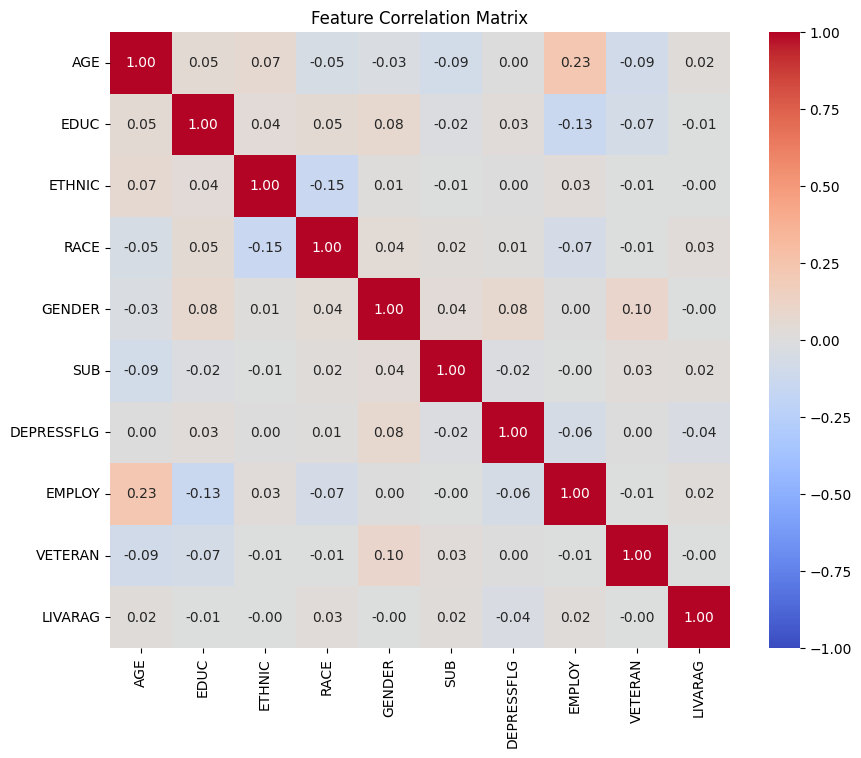

In [13]:
# Heatmap
correlation_matrix = mhc_combined.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

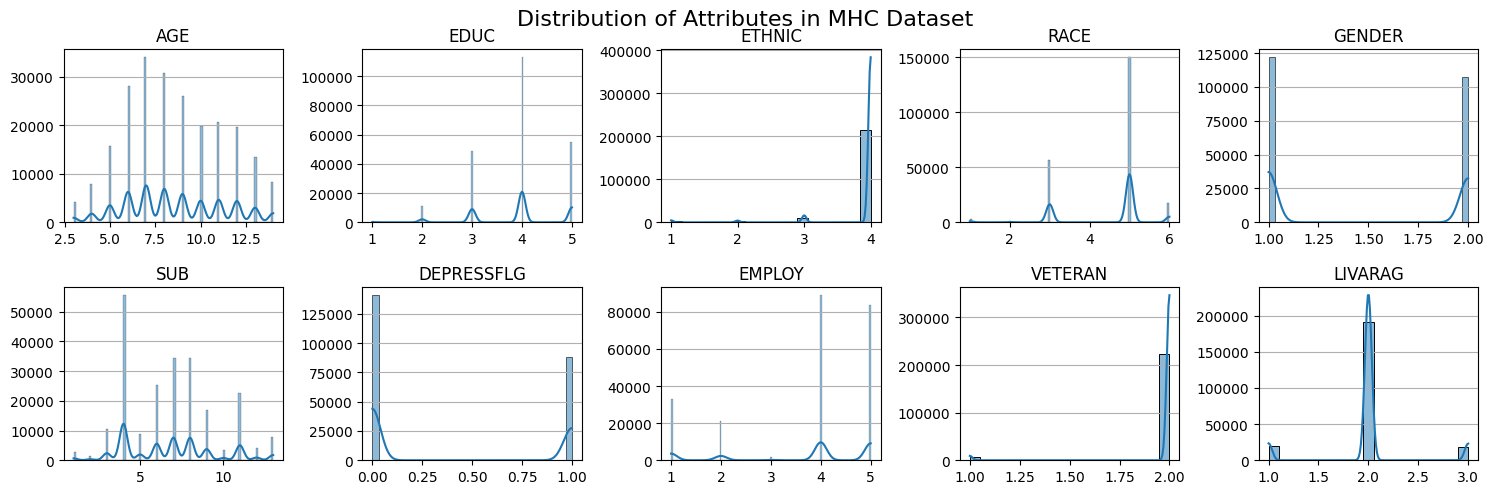

In [14]:
# Set up a figure 
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
fig.suptitle("Distribution of Attributes in MHC Dataset", fontsize=16)
axes = axes.flatten()  # Flatten for easy iteration

# Plot each histogram
for i, col in enumerate(mhc_combined.columns):
    sns.histplot(mhc_combined[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()